Shape: (1785, 9)

Columns:
 ['sample_id', 'image_path', 'Sampling_Date', 'State', 'Species', 'Pre_GSHH_NDVI', 'Height_Ave_cm', 'target_name', 'target']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1785 entries, 0 to 1784
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sample_id      1785 non-null   object 
 1   image_path     1785 non-null   object 
 2   Sampling_Date  1785 non-null   object 
 3   State          1785 non-null   object 
 4   Species        1785 non-null   object 
 5   Pre_GSHH_NDVI  1785 non-null   float64
 6   Height_Ave_cm  1785 non-null   float64
 7   target_name    1785 non-null   object 
 8   target         1785 non-null   float64
dtypes: float64(3), object(6)
memory usage: 125.6+ KB


,sample_id,image_path,Sampling_Date,State,Species,Pre_GSHH_NDVI,Height_Ave_cm,target_name,target
0,ID1011485656__Dry_Clover_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Clover_g,0.0000
1,ID1011485656__Dry_Dead_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Dead_g,31.9984
2,ID1011485656__Dry_Green_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Green_g,16.2751
3,ID1011485656__Dry_Total_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Total_g,48.2735
4,ID1011485656__GDM_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,GDM_g,16.2750



Missing Values:
 sample_id        0
image_path       0
Sampling_Date    0
State            0
Species          0
Pre_GSHH_NDVI    0
Height_Ave_cm    0
target_name      0
target           0
dtype: int64


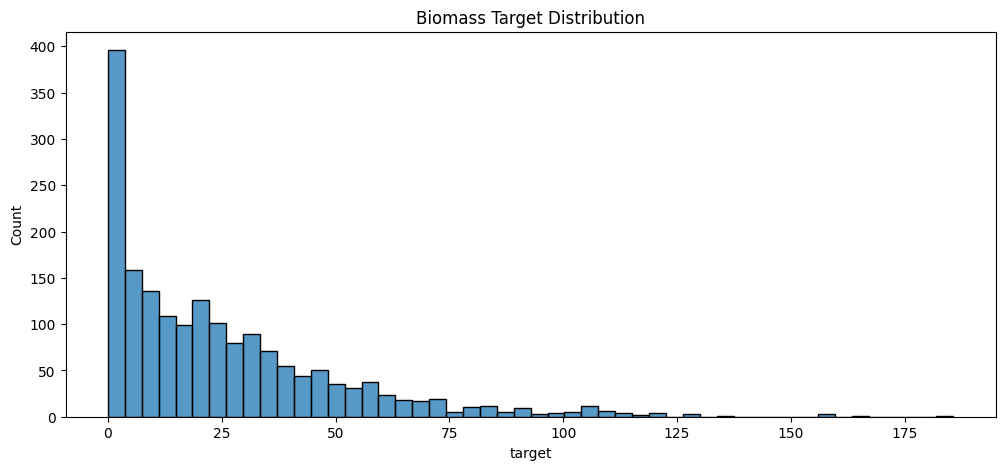

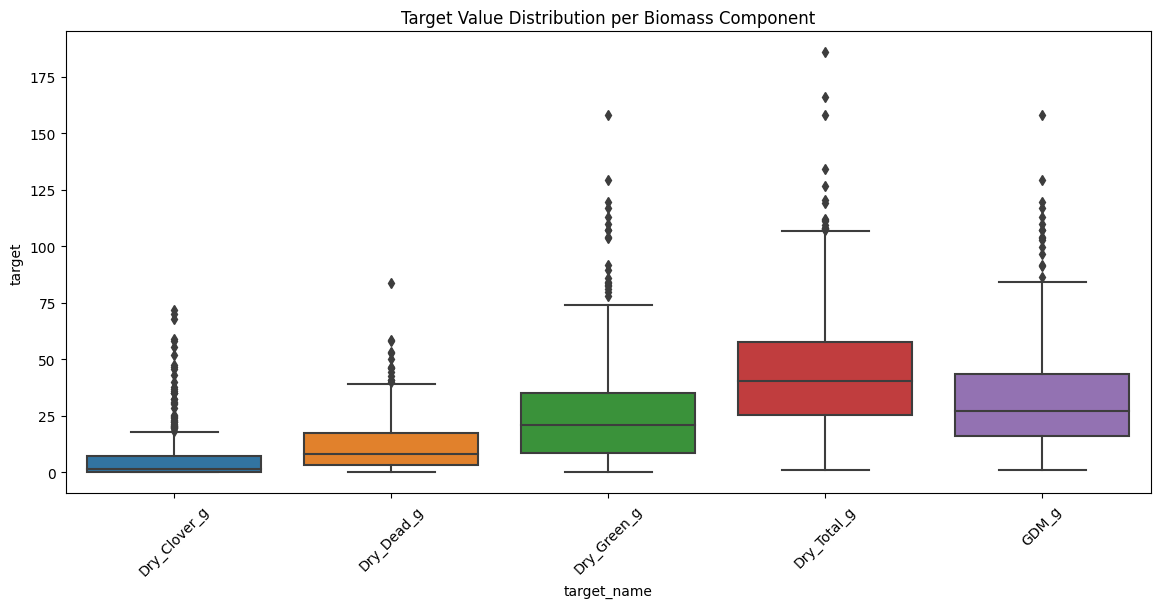

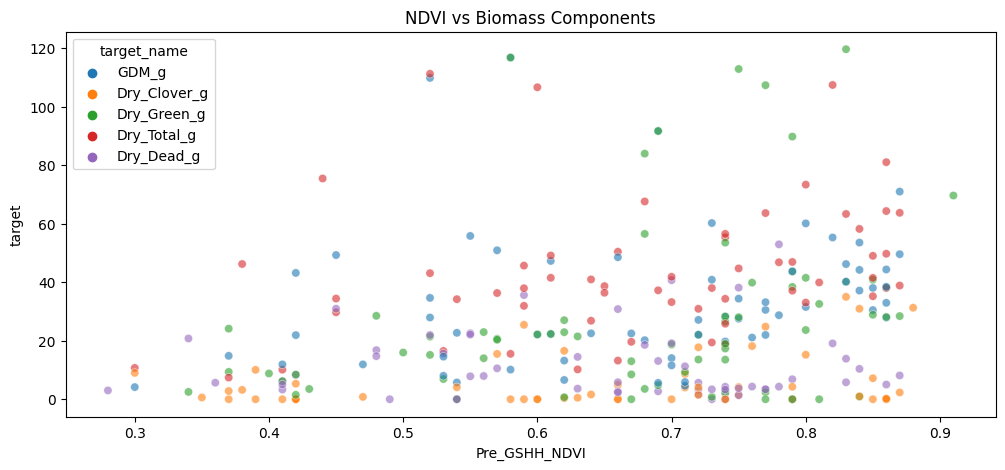

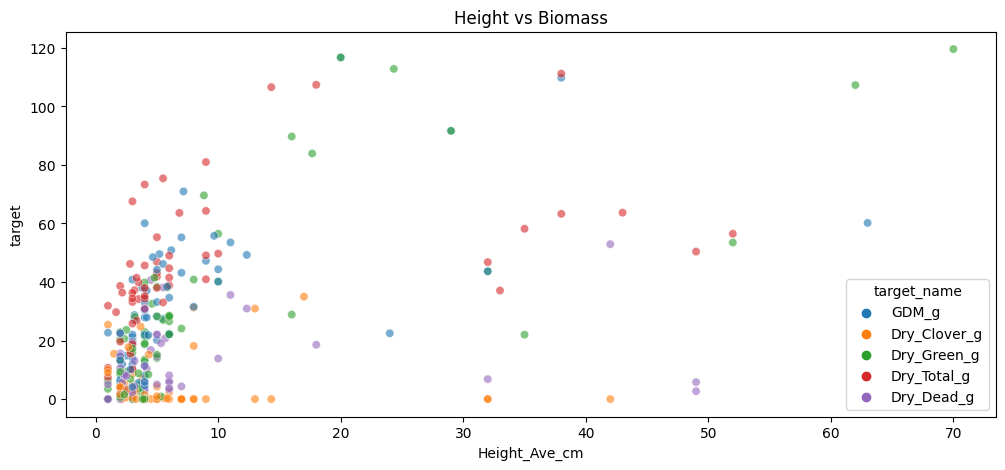

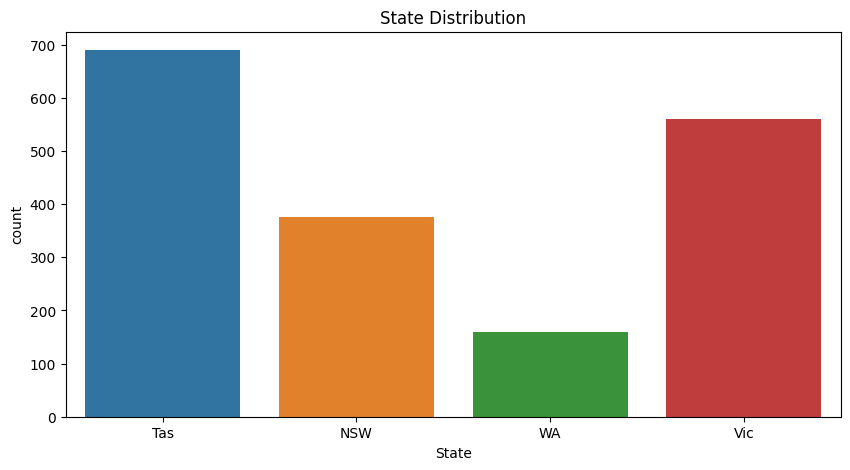

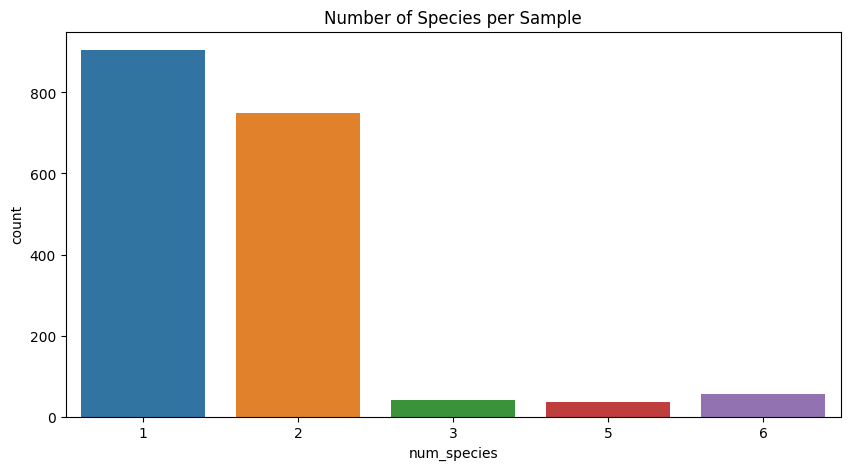

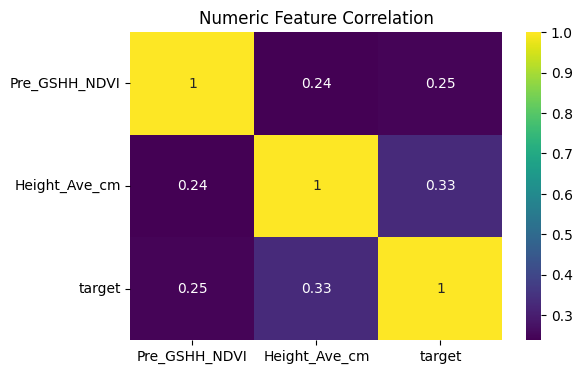

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

train_path = "/kaggle/input/csiro-biomass/train.csv"
train = pd.read_csv(train_path)

# ---- Basic structure ----
print("Shape:", train.shape)
print("\nColumns:\n", train.columns.tolist())
print("\nInfo:")
train.info()

# ---- Quick look ----
display(train.head())

# ---- Check missing values ----
print("\nMissing Values:\n", train.isna().sum())

# ---- Target distribution ----
plt.figure(figsize=(12, 5))

sns.histplot(train['target'], bins=50)
plt.title("Biomass Target Distribution")
plt.show()

# ---- Distribution by target_name ----
plt.figure(figsize=(14, 6))
sns.boxplot(data=train, x="target_name", y="target")
plt.xticks(rotation=45)
plt.title("Target Value Distribution per Biomass Component")
plt.show()

# ---- NDVI vs biomass ----
plt.figure(figsize=(12, 5))
sns.scatterplot(
    data=train.sample(300, random_state=42), 
    x="Pre_GSHH_NDVI", 
    y="target", 
    hue="target_name", 
    alpha=0.6
)
plt.title("NDVI vs Biomass Components")
plt.show()

# ---- Height vs biomass ----
plt.figure(figsize=(12, 5))
sns.scatterplot(
    data=train.sample(300, random_state=42), 
    x="Height_Ave_cm", 
    y="target", 
    hue="target_name", 
    alpha=0.6
)
plt.title("Height vs Biomass")
plt.show()

# ---- State distribution ----
plt.figure(figsize=(10, 5))
sns.countplot(data=train, x="State")
plt.title("State Distribution")
plt.show()

# ---- Species complexity ----
train['num_species'] = train['Species'].apply(lambda x: len(x.split('_')))
plt.figure(figsize=(10, 5))
sns.countplot(x='num_species', data=train)
plt.title("Number of Species per Sample")
plt.show()

# ---- Correlation of numeric features ----
numeric_cols = ["Pre_GSHH_NDVI", "Height_Ave_cm", "target"]
corr = train[numeric_cols].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="viridis")
plt.title("Numeric Feature Correlation")
plt.show()